Code to analyse the boundary search done in the HMS O2 computing cluster.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
subfolder="2023_08_15_N4Pb1000_extendu"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="14947436"
njobs=16
basename="N4Pb1000" 

name_ashape="ashape_%s"%basename
extremespars=[[1e-7,1e7]] #copy-paste from the boundary search
absder="True" 


folder to check /Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/tocheck_N4Pb1000
folders are
['/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_9', '/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_8', '/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_3', '/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_2', '/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_11', '/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_4', '/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_10', '/Users/

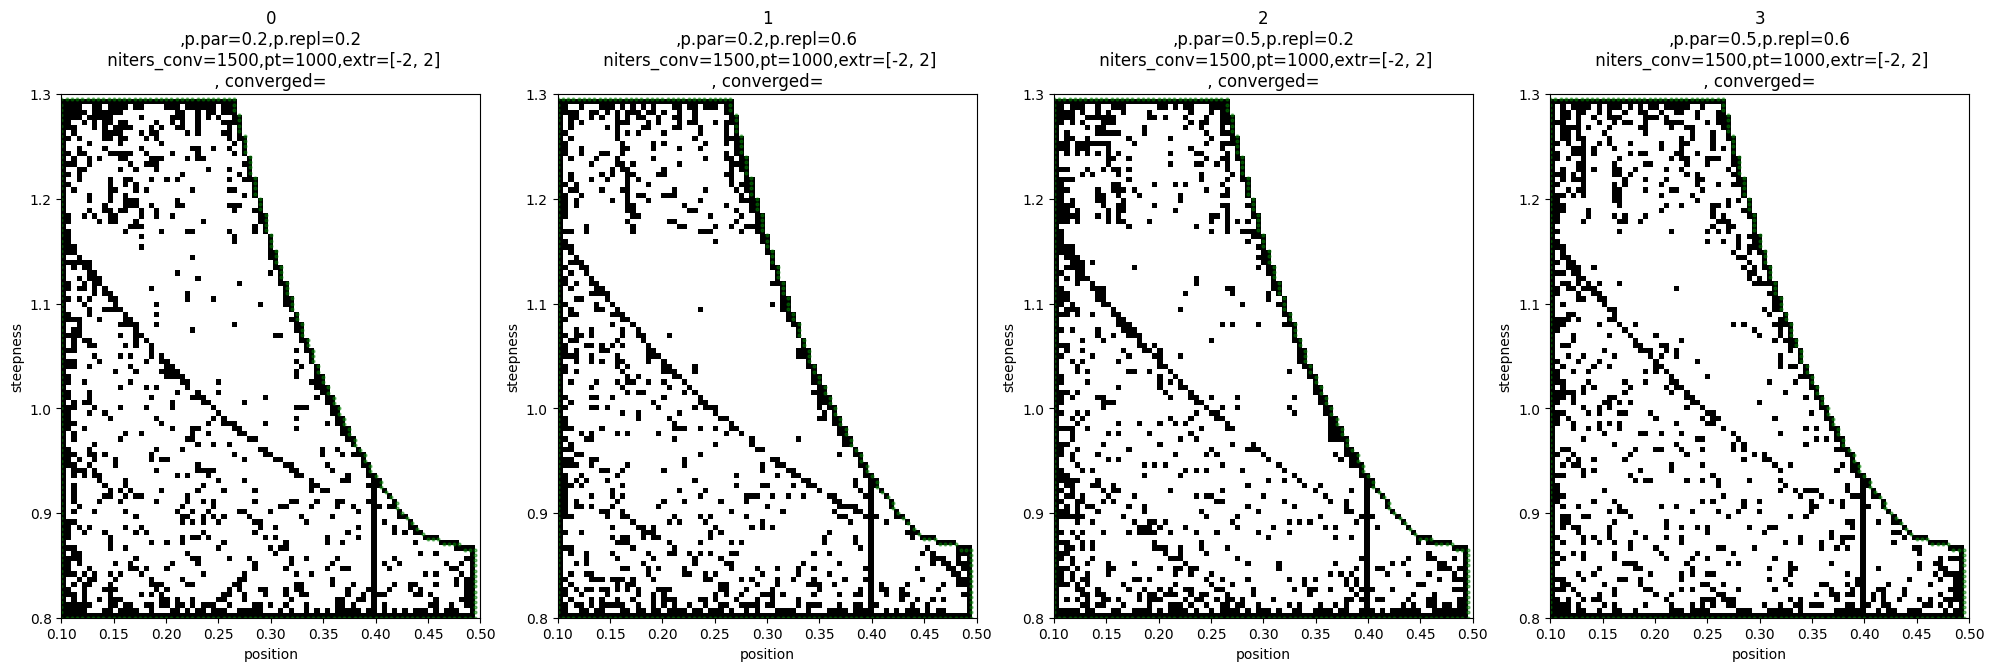

writing file to check in mat_N4Pb1000_4.in
jid is 5
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_5_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_5.in
jid is 6
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_6_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_6.in
jid is 7
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_7_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_7.in
jid is 8
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_8_last.npy
no jid_num, timediff and converged unknown.


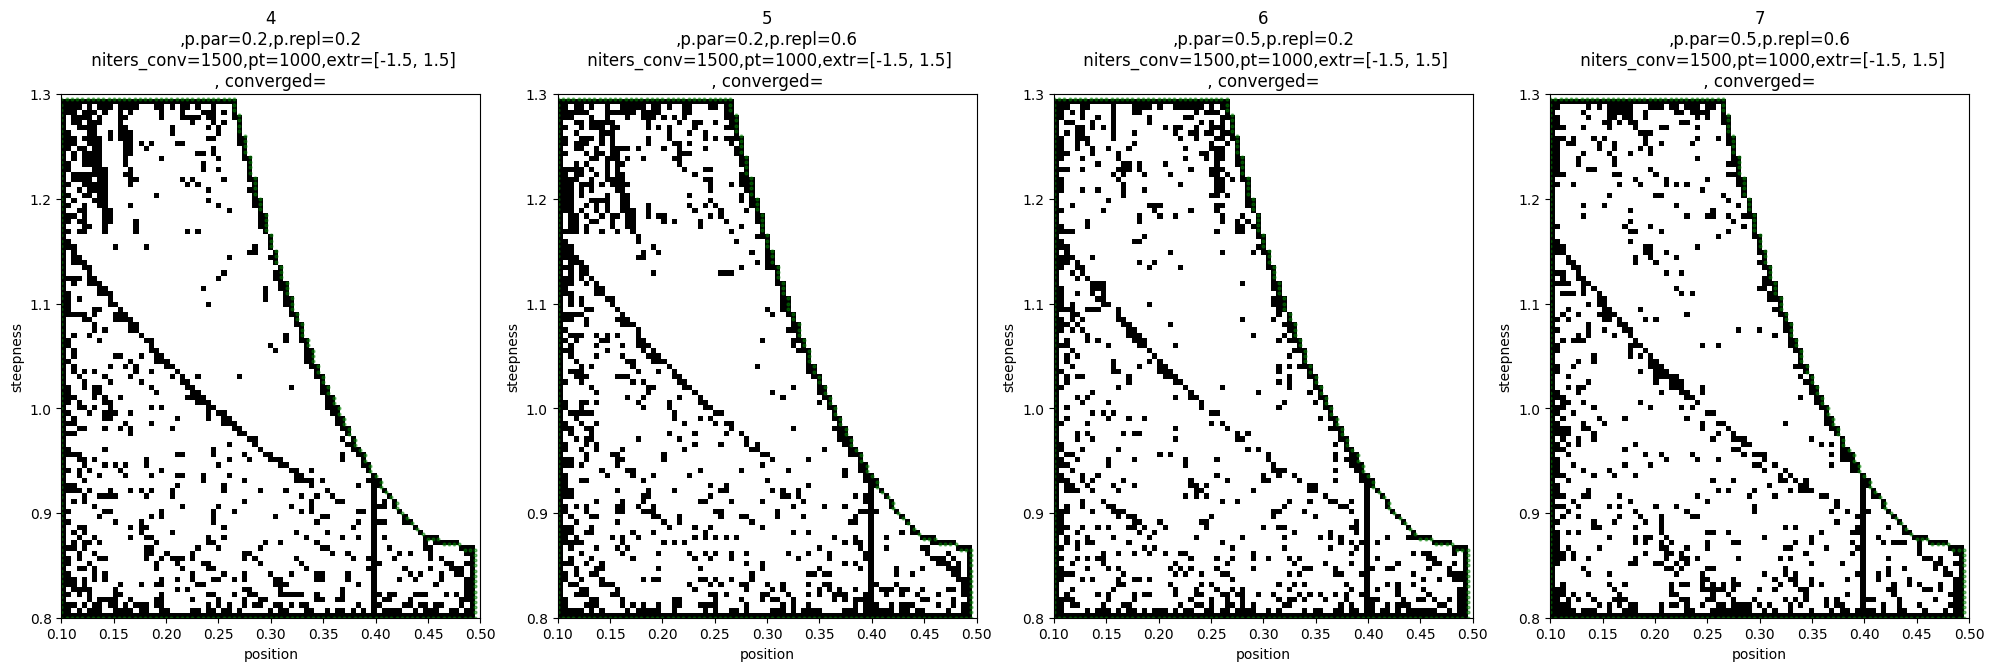

writing file to check in mat_N4Pb1000_8.in
jid is 9
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_9_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_9.in
jid is 10
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_10_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_10.in
jid is 11
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_11_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_11.in
jid is 12
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_12_last.npy
no jid_num, timediff and converged unknown.


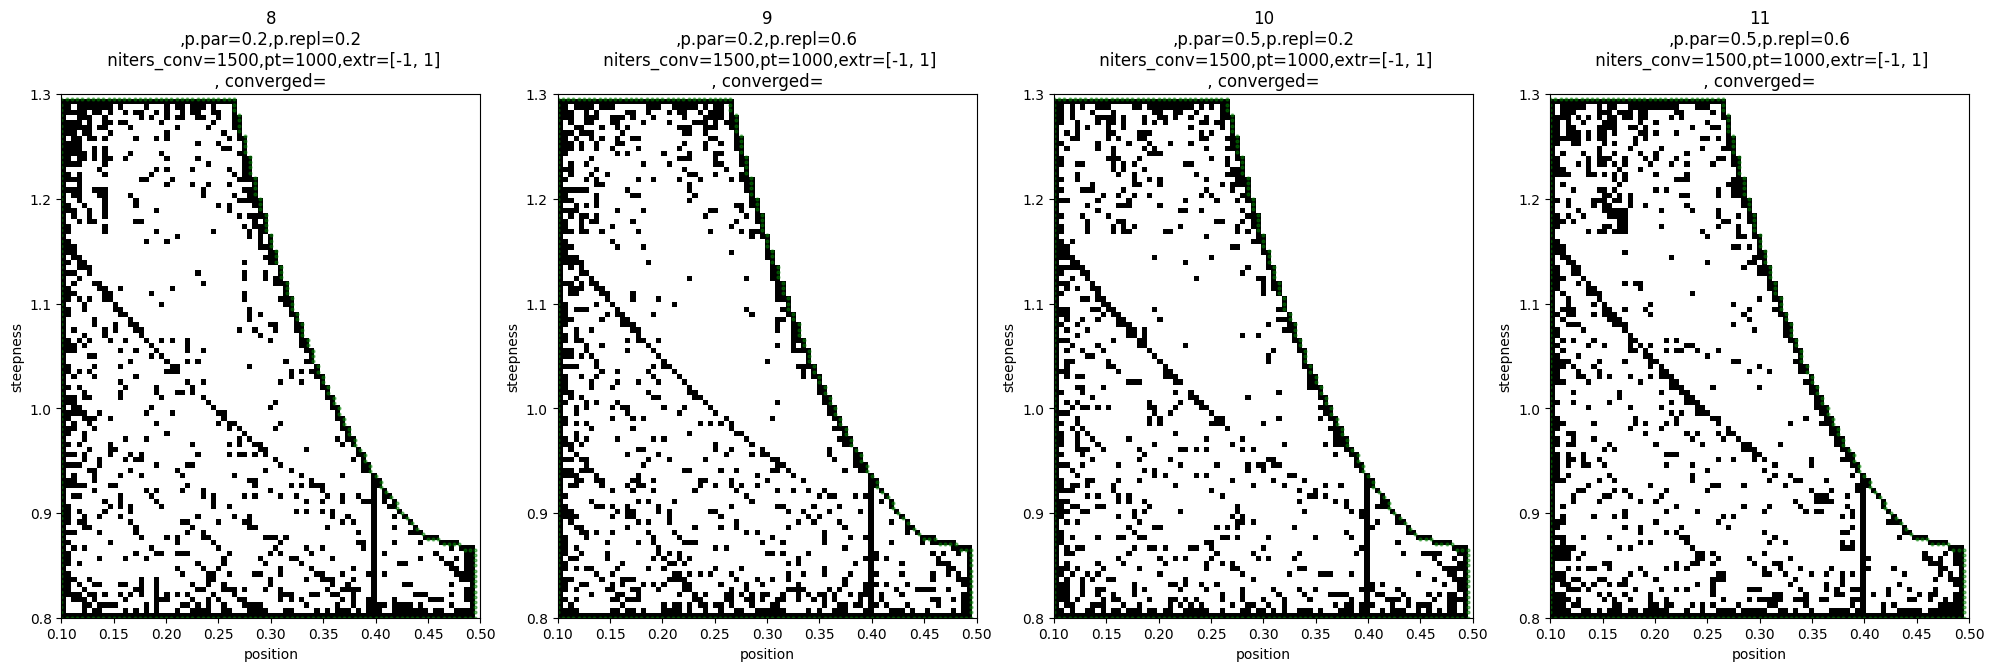

writing file to check in mat_N4Pb1000_12.in
jid is 13
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_13_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_13.in
jid is 14
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_14_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_14.in
jid is 15
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/final_results/mat_N4Pb1000_15_last.npy
no jid_num, timediff and converged unknown.
writing file to check in mat_N4Pb1000_15.in


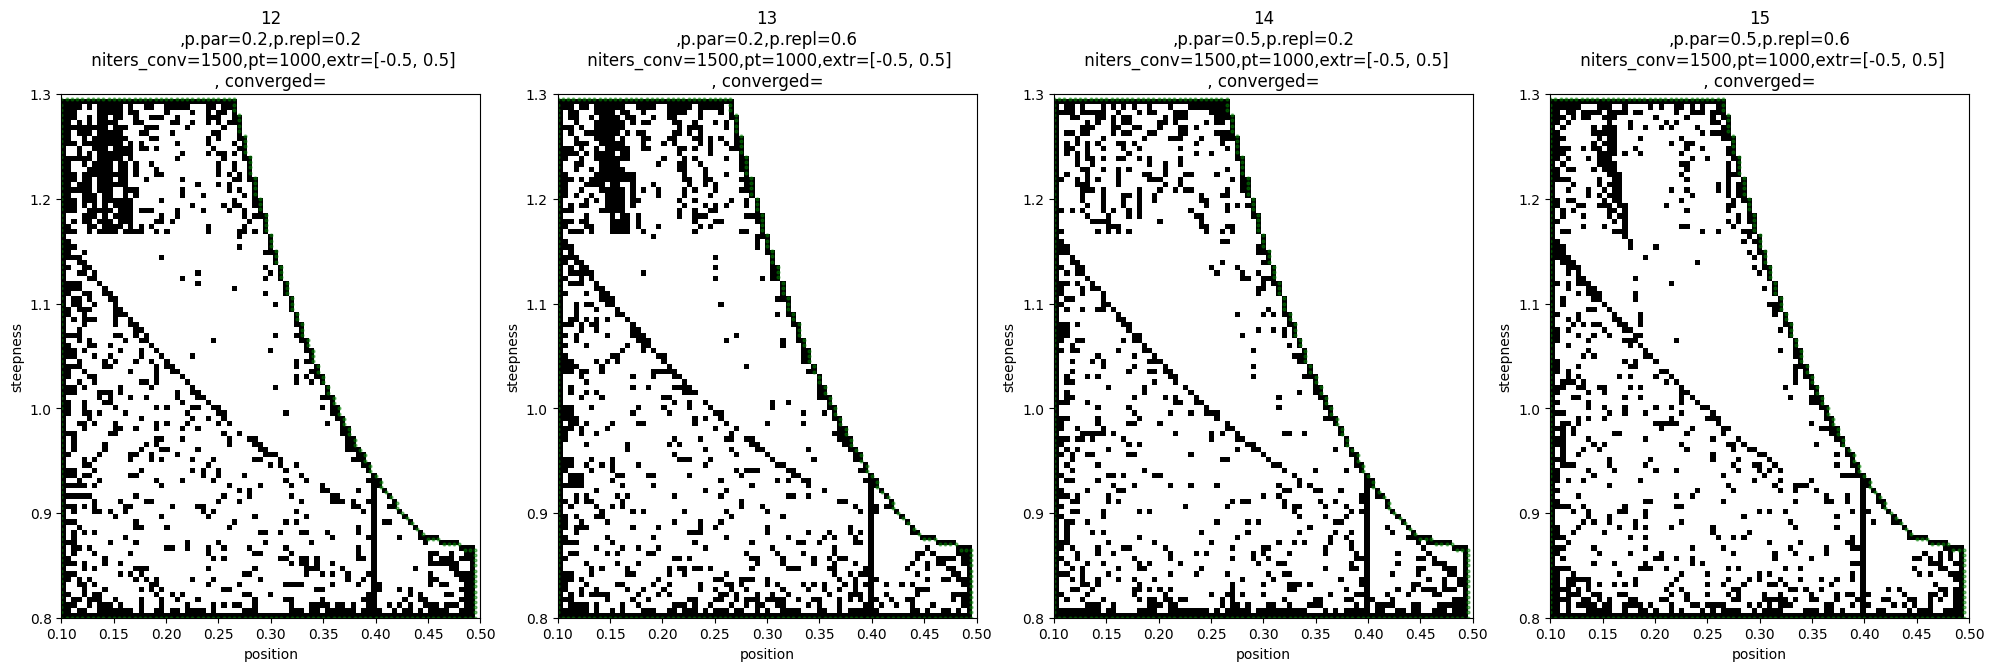

folder to check with mathematica is /Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/tocheck_N4Pb1000
(101, 81)


In [3]:
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()



args={'njobs':16, #None if any of the searches failed, otherwise indicate number of jobs 
      'final':True, #jobs converged (False if the jobs were killed due to e.g. time constraints)
      'printtocheck':True,#print results to check with an alternative method or software e.g. mathematica
      'fldr':folder1,
      'basename':basename,
    'joinmats':True,
      'jid_num':None,  #I accidentally deleted the *.out files and recovered them from a backup of the cluster that did not include them all, therefore do not check for convergence or timediff. I had previously checked that all were converged anyways.
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True,#True if the search was launched for different parameter ranges
     'unfinishedfolder':None} #indicate folder where intermediate results are saved, if final=False
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   
    


It seems that all are good. Let's doublecheck with mathematica:

In [4]:
checkf=results[1] 

In [5]:
print(checkf)
P=1000 
command="wolframscript -file ../bin/N4Pol_basal_count.wl '%s' '%s' '%s'"%(checkf,absder,P)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/tocheck_N4Pb1000
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu/tocheck_N4Pb1000
P value is 1000
mat_N4Pb1000_0.in
mat_N4Pb1000_0_checked2.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,2

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

limits of parameters:,1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;1e-07 10000000.0;

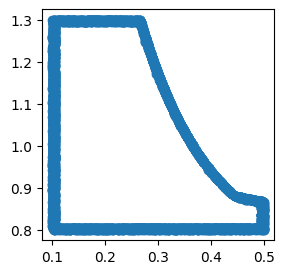

In [6]:
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked2" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]] #copy-paste from what is printed above
             
              
              
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(len(parlims_nums)):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos)
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [7]:
folder1

'/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2023_08_15_N4Pb1000_extendu'

2023_8_21
[7.0]


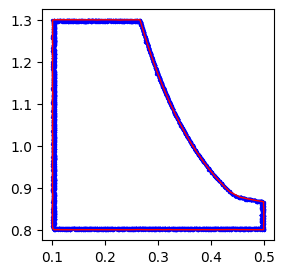

./ashapes/ashape_N4Pb1000_ul_7_2023_8_21.npy


In [11]:

localt=time.localtime()
string="%d_%d_%d"%(localt[0],localt[1],localt[2])
print(string)


plims=[np.log10(x[1]) for x in extremespars[-2:]]
print(plims)
name_ashape="ashape_N4Pb1000_ul"
for i in range(len(plims)):
    data=checked_pos_stp[i]
    

    l_p=[(data[0][j],data[1][j]) for j in range(len(data[0]))] 
    alpha=25
    plt.figure(figsize=(3,3))
    plt.scatter(data[0],data[1],color="b",s=2)

    a=alphashape.alphashape(l_p,alpha=alpha)   #tweak alpha until it adapts well to the points
    plt.plot(a.exterior.xy[0],a.exterior.xy[1],color="r",linewidth=1)
    plt.show()
    namesave=os.path.join(ashapesfolder,"%s_%d_%s.npy"%(name_ashape,plims[i],string))
    print(namesave)
    np.save(namesave,(a.exterior.xy))


In [5]:
sys.path.append("../bin")
from analyse_mathematica_results import analyse_file, print_statistics

In [9]:
tol=0.005
results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
all_outputs=[]
parlims_nums=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]] #copy-paste from what is printed above
for i in range(len(parlims_nums)):
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[]
    details_wrong=[]
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums[i]: 
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong,ax=None) #modifies (appends to) outputs and details_wrong
    all_outputs.append(outputs)    


looking at limits 0, [1e-07, 10000000.0]


looking at limits 0, [1e-07, 10000000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[317 317 317 317 317 317 317 317 317 317 317 317 317 317 317 317]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


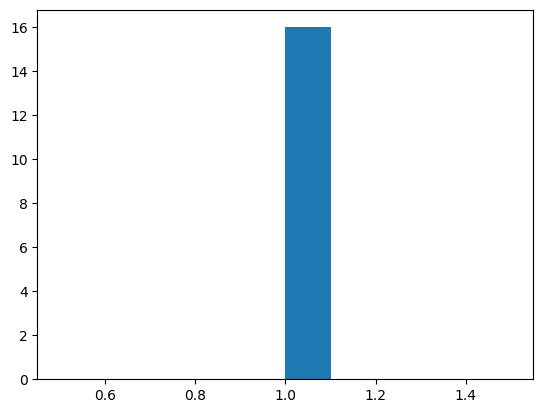

In [10]:
for i in range(len(parlims_nums)): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])